In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds_hw.csv')

# prepare duplicate data

df_duplicate = df.copy(deep=True)

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'dimaonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars(326 -- 18,823)
- carat: weight of the diamond (0.2 - 5.01)
- cut: qualityof the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point

Soal: 
1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___).

2. Berdasarkan informasi terkait kolom clarity, lakukanlah encoding yang sesuai (ubahlah kolom clarity dari kategorikal menjadi numerik).

3. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

## Nomor 1:

In [4]:
# checking missing value on column
df.isnull().any()

carat       True
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [5]:
df.info() 
# there are 125 data carat are missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# i want to see the index of missing data
df[df['carat'].isnull()].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94


In [7]:
# fill the missing value with formula calculate range weight of diamond 
# CTW = length(mm) * width(mm) * depth(mm) * depth precentage

def calculate_CTW(column):
    return round(column['x'] * column['y'] * column['z'] * (column['depth']/10000),2)

In [8]:
# Testing on duplicat table
df_duplicate['new carrat'] = df_duplicate.apply(calculate_CTW,axis=1)

In [9]:
df_duplicate

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.23
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.21
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.22
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.33
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.70
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.75
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.86


In [10]:
df['new carrat'] = df.apply(calculate_CTW,axis=1)
df['carat'] = df['carat'].fillna(df['new carrat'])

In [11]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.23
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.21
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.22
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.33
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.70
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.75
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.86


In [12]:
df_duplicate['carat'] = df_duplicate['carat'].fillna(df_duplicate['new carrat'])

In [13]:
# and this is one of the result of filling the missing value
df.iloc[[194,241,251,644,704]]

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat
194,0.70,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49,0.70
241,1.02,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,1.02
251,0.79,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64,0.79
644,0.83,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74,0.83
704,0.93,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94,0.93


Saya memilih metode mengisi manual dengan rumus menghitung kisaran berat berlian dikarenakan sudah diketahui panjang lebar kedalamn dan faktor koreksi atau presentase dari kedalaman untuk mengisi missing value pada kolom carat karena jumlah missing value terlalu sedikit dari total keseluruhan data

# Nomor 2:

In [ ]:
# Using Rank Encoding
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [25]:
# dictionary rank_clarity
rank_clarity = {
    "I1" : 12.5,
    "SI2" : 25,
    "SI1" : 37.5,
    "VS2" : 50,
    "VS1" : 62.5,
    "VVS2" : 75,
    "VVS1" : 87.5,
    "IF" : 100
}

# i make the ranking of dictionary with divide 100/total ranking (8)

In [26]:
# change value clarity to numerik value using rank_clarity
df['clarity_encoded'] = df['clarity'].map(rank_clarity)

In [27]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.23,25.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.21,37.5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.22,62.5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.29,50.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.33,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.70,37.5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.75,37.5
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.72,37.5
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.86,25.0


# Nomor 3

In [14]:
df_xyz = df[['x','y','z']]
df_xyz

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


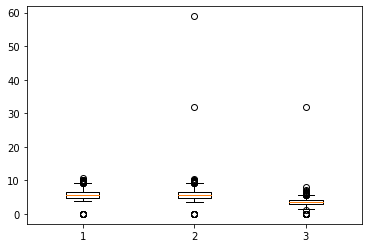

In [21]:
plt.boxplot(df[['x','y','z']])
plt.show()

Dibawah ini adalah baris yang termasuk dalam kategori outlier
- ada 3 outlier 2 dari kolom y dan 1 dari kolom z

In [24]:
df[df['y'] > 25]

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,22.62
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,5.18


In [23]:
df[df['z'] > 20]

,carat,cut,color,clarity,depth,table,price,x,y,z,new carrat
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,5.18
